<h1> Context-Aware Recommender Systems</h1>

In content-based recommender systems, we use the context information (such as time, location etc.) while building recommendation engines. These recommender systems are next generation recommendations systems, which fall into the hyper-personalization category. Though content-based recommender systems are efficient, targeted at an individual level, and consider the user's personal preferences alone while building recommendation engines, people wanted recommendation engines to be more personalized.

A typical content-based recommender system will perform the following steps:
1. Retrieve user, item and activity data
1. Define context.
2. Create a context profile with respect to a user for item content.
3. Generate recommendations for a context

<h2>Step 1 - Retrieve Data</h2>
The first step would always be to gather the data and pull it into the programming environment.
For our use case, we download the MovieLens dataset containing three sets of data,

Movie data containing a certain movie's information, such as movieID, release date, URL, genre details, and so on
User data containing the user information, such as userID, age, gender, occupation, ZIP code, and so on
Ratings data containing userID, itemID, rating, timestamp

In [1]:
# Import the libraries that are going to be used here
import pandas as pd
import numpy as np
import scipy
import sklearn
import datetime

In [2]:
# Column headers for the dataset
data_cols = ['user id','movie id','rating','timestamp']
item_cols = ['movie id','movie title','release date', 'video release date','IMDb URL','unknown','Action', 'Adventure','Animation','Childrens','Comedy','Crime', 'Documentary','Drama','Fantasy','Film-Noir','Horror', 'Musical','Mystery','Romance ','Sci-Fi','Thriller', 'War' ,'Western']
user_cols = ['user id','age','gender','occupation', 'zip code']

In [3]:
# List of users
df_u_user = pd.read_csv('/home/nbuser/library/dataset/u.user', header=None, sep='|', names=user_cols, encoding='latin-1')
df_u_user = df_u_user.sort_values('user id', ascending=1)
df_u_user.columns
df_u_user.head(10)

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [4]:
# List of movie items
df_u_item = pd.read_csv('/home/nbuser/library/dataset/u.item', header=None, sep='|', names=item_cols, encoding='latin-1')
df_u_item = df_u_item.sort_values('movie id', ascending=1)
df_u_item.columns
df_u_item.head(10)

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [5]:
# Remove the several columns from the dataframe as it's not required for this analysis
df_u_item_final = df_u_item.drop(['release date', 'video release date','IMDb URL'], axis=1)
df_u_item_final.head(10)

,movie id,movie title,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
# User activity data
df_u_data = pd.read_csv('/home/nbuser/library/dataset/u.data', header=None, sep='\t', names=data_cols, encoding='latin-1')
df_u_data = df_u_data.sort_values('user id', ascending=1)
df_u_data.columns
df_u_data.head(10)

,user id,movie id,rating,timestamp
66567,1,55,5,875072688
62820,1,203,4,878542231
10207,1,183,5,875072262
9971,1,150,5,876892196
22496,1,68,4,875072688
9811,1,201,3,878542960
9722,1,157,4,876892918
9692,1,184,4,875072956
9566,1,210,4,878542909
9382,1,163,4,875072442


In [7]:
df_u_data.insert(4, 'hour', '0')
df_u_data.head()

,user id,movie id,rating,timestamp,hour
66567,1,55,5,875072688,0
62820,1,203,4,878542231,0
10207,1,183,5,875072262,0
9971,1,150,5,876892196,0
22496,1,68,4,875072688,0


<h2>Step 2 - Creating context profile</h2>
In the following section, we shall write code to create context profile of the user. We chose the timestamp information available in the dataset and calculate the preference value for movie genres for each user for each hour of the day. This context profile information is used for generating context aware recommendations.

In [15]:
for i in range(0, len(df_u_data.index)):
    d = datetime.datetime.fromtimestamp(df_u_data.loc[i, ['timestamp']])
    df_u_data.loc[i, ['hour']] = d.hour

In [19]:
df_u_data_final = df_u_data.drop(['timestamp'], axis=1)
df_u_data_final.head()

,user id,movie id,rating,hour
66567,1,55,5,3
62820,1,203,4,7
10207,1,183,5,3
9971,1,150,5,5
22496,1,68,4,3


<h2>Step 3 - </h2>


In [39]:
# We merge the Movies and Ratings datasets using merge() function
#ratings_ctx = pd.merge(x = raw_data, y = movies, by = "MovieId", all.x = TRUE)

ratings = pd.merge(df_u_item, df_u_data_final, on='movie id')
ratings.head(5)

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Childrens,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user id,rating,hour
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,1,5,22
1,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,2,4,3
2,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,5,4,16
3,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,6,4,20
4,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,10,4,18


<h2>Step 4 - </h2>

The context that we want to introduce to our previous content-based recommendation is the hour of the day, that is, our recommendations will be made as per the time of the day. The set of recommendations for an active user will be different for each hour of the day. Usually, these changes in recommendations are due to the ordering of the recommendations as per the hour. We will see next how we achieve this.

In [68]:
##### check out 10, 500, 900, 943
UCP_pref = ratings.loc[ratings['user id'] == 943, ['hour', 'unknown','Action', 'Adventure','Animation','Childrens','Comedy','Crime', 'Documentary','Drama','Fantasy','Film-Noir','Horror', 'Musical','Mystery','Romance ','Sci-Fi','Thriller', 'War' ,'Western']]
UCP_pref


,hour,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
582,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1903,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2228,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2495,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3818,4,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4000,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4174,3,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4597,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4873,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
5178,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0


In [69]:
UCP_pref_sc = UCP_pref.groupby(['hour']).sum()
UCP_pref_sc

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
hour,,,,,,,,,,,,,,,,,,,
1,0,3,2,0,0,0,0,0,2,0,0,0,0,0,1,1,1,1,0
2,0,3,2,0,0,3,2,0,6,0,0,0,0,1,1,1,2,1,0
3,0,8,3,0,0,8,2,0,4,0,0,2,0,1,4,3,8,2,0
4,0,42,21,2,8,44,14,0,42,2,0,11,4,1,26,11,24,11,8
19,0,8,7,0,1,1,0,0,3,0,0,1,0,0,1,6,0,0,1


In [70]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(rt2)
df_normalized = pd.DataFrame(np_scaled)
df_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.000000,0.000000,0.0,0.000,0.000000,0.000000,0.0,0.000,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.041667,0.090909,0.000
1,0.0,0.000000,0.000000,0.0,0.000,0.068182,0.142857,0.0,0.100,0.0,0.0,0.000000,0.0,1.0,0.00,0.0,0.083333,0.090909,0.000
2,0.0,0.128205,0.052632,0.0,0.000,0.181818,0.142857,0.0,0.050,0.0,0.0,0.181818,0.0,1.0,0.12,0.2,0.333333,0.181818,0.000
3,0.0,1.000000,1.000000,1.0,1.000,1.000000,1.000000,0.0,1.000,1.0,0.0,1.000000,1.0,1.0,1.00,1.0,1.000000,1.000000,1.000
4,0.0,0.128205,0.263158,0.0,0.125,0.022727,0.000000,0.0,0.025,0.0,0.0,0.090909,0.0,0.0,0.00,0.5,0.000000,0.000000,0.125


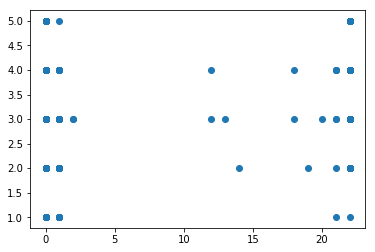

In [47]:
import matplotlib.pyplot
import pylab

matplotlib.pyplot.scatter(rt['hour'],rt['rating'])


In [ ]:
# Now, let's start building a context profile for a user with the user ID 943:

# Extract ratings information for the active user(943) and removing UserId, MovieId, Rating, Timestamp columns, as shown as follow:
UCP = ratings_ctx[(ratings_ctx$UserId == 943),][,-c(2,3,4,5)]

# As a next step, we compute the columns of all the item features. This columnwise sum is used to compute the preferences for the item features for each hour of the day.

# We compute the column wide sum of each column using aggregate() function:
UCP_pref = aggregate(.~hours,UCP[,-1],sum)

# From the preceding figure, we can see the time preferences for each of the movie genres for the active user 943. We can observe that during the ninth hour of the day, the user watches more movies, especially action/drama/comedy movies:

# We can normalize the preceding data between 0-1 using following function:
UCP_pref_sc = cbind(context = UCP_pref[,1],t(apply(UCP_pref[,-1], 1, function(x)(x-min(x))/(max(x)-min(x)))))


<h3>Generating context-aware recommendations</h3>

In this section, we will extend the previous model to include context information and generate a contextaware recommendation engine.

Now that we have created the context profile for the active user, let's start generating context-aware recommendations for the user.
For this, we shall reuse the recommend object built using R, which contains content recommendations for all the users.


In [ ]:
# Let's see the recommendations made to the user 943 using the content-based system:
recommend$MovieId

# Now, to these content recommendations, we add our time or hour of the day dimension and then generate recommendations as per the current context.

# We merge recommendations and movies dataset using merge() function:
UCP_pref_content = merge(x = recommend, y = movies, by = "MovieId", all.x = TRUE)


With the preceding step, we have computed all the required matrices, user context profile (UCP_Pref_SC) and user content recommendations (UCP_Pref_content).

Suppose we want to generate recommendations for the user at the ninth hour; we just need to perform an element wise multiplication of user content recommendations and the context row for the ninth hour of the day from the UCP_pref_SC object. This is given as follows:



In [ ]:
# Performing element wise multiplication for the User content recommendations and the ninth hour context preferences for the user:
active_user =cbind(UCP_pref_content$MovieId,(as.matrix(UCP_pref_content[,-c(1,2,3)]) %*% as.matrix(UCP_pref_sc[4,2:19])))

# The results can be seen as follows; we can observe that the preference for MovieId 3 is 0.5 where as for MovieId 4 the preference is 2.8
head(active_user)

# We can create a dataframe object of the prediction object:
active_user_df = as.data.frame(active_user)

# Next, we add column names to the predictions object:
names(active_user_df) = c('MovieId','SimVal')

# Then we sort the results:
FinalPredicitons_943 = active_user_df[order(-active_user_df$SimVal),]
